In [ ]:
//@version=5
indicator("fucking candles", overlay = true, max_labels_count = 300, max_lines_count = 300, max_boxes_count = 300, max_bars_back = 300)

// === Inputs ===
bCol = input.color(#008080, title="Bull Border")
rCol = input.color(#e20000, title="Bear Border")
bgB = input.color(color.new(#008080, 20), title="Bull Body")
bgR = input.color(color.new(#FF0000, 20), title="Bear Body")


    // === Input your time zone (Manila = GMT+8) =000000000000000000
timeSessionStart = timestamp("GMT+8", year, month, dayofmonth, 6, 0)  // Start of day
isNewDay = ta.change(time("D"))  // Detect new day

// Track the current day's developing close on each bar
var float devClose = na
if isNewDay
    devClose := close  // reset on new day
else
    devClose := close  // update each bar


// === Default Daily Candle (6:00 AM) ===
dO = request.security(syminfo.tickerid, "D", open)
dH = request.security(syminfo.tickerid, "D", high)
dL = request.security(syminfo.tickerid, "D", low)
dC = request.security(syminfo.tickerid, "D", close)


// Calculate daily high and low using 'day' timeframe
var float dailyHigh = na
var float dailyLow = na
newDay = ta.change(time("D"))


// On new day, reset high/low
if newDay
    dailyHigh := close
    dailyLow := open
else
    dailyHigh := math.max(dailyHigh, close)
    dailyLow := math.min(dailyLow, open)


// Midpoint of the daily candle
midPrice = (dailyHigh + dailyLow) / 2


dBull = dC >= dO
dCol = dBull ? bCol : rCol
dBg = dBull ? bgB : bgR


// Offset for visuals
ofs = 10
bw = 2
rIdx = bar_index + ofs + bw / 2
lIdx = bar_index + ofs - bw / 2
xMid = int(bar_index + ofs)


// Body of daily candle box
var box dBx = na
box.delete(dBx)
tB = math.max(dO, devClose) //y=dC
bB = math.min(dO, devClose)
dBx := box.new(left=int(lIdx), right=int(rIdx), top=tB, bottom=bB, border_color=dCol, bgcolor=dBg)


// Wicks for daily candle
var line dW1 = na
var line dW2 = na
line.delete(dW1)
line.delete(dW2)
dW1 := line.new(x1=xMid, y1=dH, x2=xMid, y2=tB, color=dCol)
dW2 := line.new(x1=xMid, y1=bB, x2=xMid, y2=dL, color=dCol)



// Labels for daily candle
var label lblO = na
var label lblH = na
var label lblL = na
var label lblC = na
label.delete(lblO)
label.delete(lblH)
label.delete(lblL)
label.delete(lblC)


lblStyle = label.style_label_right
lblSize = size.tiny
lblOfs = -2


lblO := label.new(x=xMid + lblOfs, y=dO, text="6O " + str.tostring(dO, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblH := label.new(x=xMid + lblOfs, y=dH, text="6H " + str.tostring(dH, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblL := label.new(x=xMid + lblOfs, y=dL, text="6L " + str.tostring(dL, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblC := label.new(x=xMid + lblOfs, y=devClose, text="6C " + str.tostring(dC, format.mintick), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)

// === Custom Daily Candle (8:00 AM Manila) ===
sh = 24
sm = 0
st = timestamp("UTC", year, month, dayofmonth, sh, sm)


var float cO = na
var float cH = na
var float cL = na
var float cC = na


if (time == st)
    cO := open
    cH := high
    cL := low
    cC := close


if (not na(cO))
    cH := math.max(cH, high)
    cL := math.min(cL, low)
    cC := close


cBull = cC >= cO
cCol = cBull ? bCol : rCol
cBg = cBull ? bgB : bgR


cOfs = 12
cbw = 2
crIdx = bar_index + cOfs + cbw / 2
clIdx = bar_index + cOfs - cbw / 2
cX = int(bar_index + cOfs)


// Custom body box
var box cBx = na
box.delete(cBx)
ctB = math.max(cO, devClose) //y=dC
cbB = math.min(cO, devClose)
cBx := box.new(left=int(clIdx), right=int(crIdx), top=ctB, bottom=cbB, border_color=cCol, bgcolor=cBg)


// Custom wicks
var line cW1 = na
var line cW2 = na
line.delete(cW1)
line.delete(cW2)
cW1 := line.new(x1=cX, y1=cH, x2=cX, y2=ctB, color=cCol)
cW2 := line.new(x1=cX, y1=cbB, x2=cX, y2=cL, color=cCol)


// Custom labels
var label clO = na
var label clH = na
var label clL = na
var label clC = na
label.delete(clO)
label.delete(clH)
label.delete(clL)
label.delete(clC)


clStyle = label.style_label_left
clSize = size.tiny
clOfs = 2


clO := label.new(x=cX + clOfs, y=cO, text="8O " + str.tostring(cO, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clH := label.new(x=cX + clOfs, y=cH, text="8H " + str.tostring(cH, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clL := label.new(x=cX + clOfs, y=cL, text="8L " + str.tostring(cL, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clC := label.new(x=cX + clOfs, y=devClose, text="8C " + str.tostring(dC, format.mintick), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// === High and Low Lines (using bar_index for x coords) ===
// Track bar_index of high and low bars within current day
var int highBarIndex = na
var int lowBarIndex = na
var float dayHigh = na
var float dayLow = na


startOfDay = timestamp(year, month, dayofmonth, 0, 0)
t6amManila = timestamp("Asia/Manila", year, month, dayofmonth, 6, 0)


issNewDay = ta.change(time("D"))


if (time >= startOfDay)
    if na(dayHigh) or high > dayHigh
        dayHigh := high
        highBarIndex := bar_index
    if na(dayLow) or low < dayLow
        dayLow := low
        lowBarIndex := bar_index


if issNewDay
    dayHigh := na
    dayLow := na
    highBarIndex := na
    lowBarIndex := na


// Draw high line from high bar index to current xMid
var line highLine = na
if not na(dayHigh) and not na(highBarIndex)
    if na(highLine)
        highLine := line.new(x1=highBarIndex, y1=dayHigh, x2=xMid, y2=dayHigh, color=color.black, width=1, style = line.style_dotted)
    else
        line.set_xy1(highLine, highBarIndex, dayHigh)
        line.set_xy2(highLine, xMid, dayHigh)


// Draw low line from low bar index to current xMid
var line lowLine = na
if not na(dayLow) and not na(lowBarIndex)
    if na(lowLine)
        lowLine := line.new(x1=lowBarIndex, y1=dayLow, x2=xMid, y2=dayLow, color=color.black, width=1, style = line.style_dotted)
    else
        line.set_xy1(lowLine, lowBarIndex, dayLow)
        line.set_xy2(lowLine, xMid, dayLow)





// --- 6:00 AM Asia/Manila horizontal line ---
// Manila 6:00 AM timestamp today
manila_6am = timestamp("GMT+8", year, month, dayofmonth, 30, 0)


// Detect bar where time crosses 6:00 AM Manila
isStartBar6am = (time >= manila_6am) and (time[1] < manila_6am)


// Store 6:00 AM bar open price and index
var float price6am = na
var int bar6am_index = na


if isStartBar6am
    price6am := open
    bar6am_index := bar_index


// Draw horizontal line from 6AM bar index to xMid at price6am
var line hLine6am = na


if not na(price6am) and not na(bar6am_index)
    line.delete(hLine6am)
    hLine6am := line.new(x1=bar6am_index, y1=price6am, x2=xMid, y2=price6am, color=color.new(#ecc900, 0), width=2, style=line.style_solid)


// --- 8:00 AM Asia/Manila horizontal line ---
// Detect bar where time crosses 8:00 AM Manila
isStartBar8am = (time >= st) and (time[1] < st)


// Store 8:00 AM bar open price and index
var float price8am = na
var int bar8am_index = na


if isStartBar8am
    price8am := open
    bar8am_index := bar_index


// Draw horizontal line from 8AM bar index to cX at price8am
var line hLine8am = na
var line hhLine8am = na


if not na(price8am) and not na(bar8am_index)
    line.delete(hLine8am)
    hLine8am := line.new(x1=bar8am_index, y1=price8am, x2=cX, y2=price8am, color=color.new(#fad400, 0), width=2, style=line.style_solid)



// Draw horizontal line that updates000000000000000000000000
var line devCloseLine = na
var line ddevCloseLine = na
if bar_index > 0
    if na(devCloseLine)
        devCloseLine := line.new(x1=bar_index, y1=devClose , x2=xMid , y2=devClose, style = line.style_dotted, color=dCol, width=1)
    else
        line.set_xy1(devCloseLine, bar_index, devClose)
        line.set_xy2(devCloseLine, bar_index + 13, devClose)
    if na(ddevCloseLine) 
        //ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid, y2=devClose, extend=extend.right, color=dCol, width=2)
        ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid , y2=devClose, style = line.style_dotted, extend=extend.right, color=color.black, width=1)
    else
        line.set_xy1(ddevCloseLine, bar_index + 19,  devClose)
        line.set_xy2(ddevCloseLine, bar_index + 20, devClose)




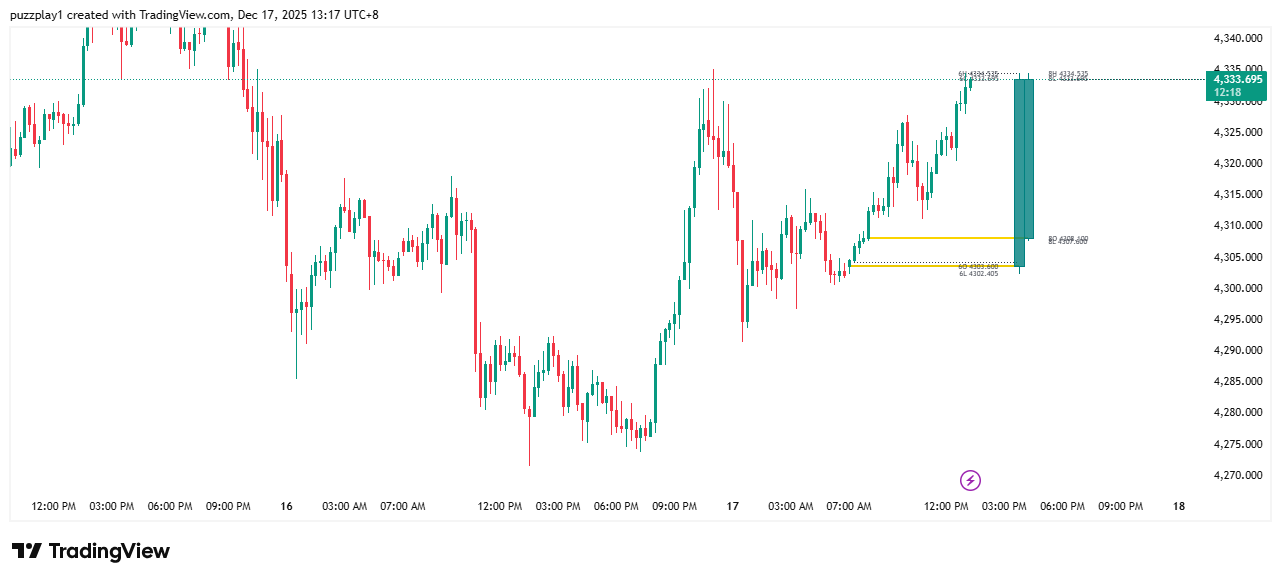